In [1]:
from SAXSsimulations import  Sphere, Cylinder
from SAXSsimulations.plotting import *

In [2]:
simulation = Sphere(size = 10, nPoints = 501, volFrac = 0.05)
simulation.place_shape()

volume fraction is 0.00050, radius is 0.53, center at (-0.6,3.0,2.1) 
volume fraction is 0.00163, radius is 0.53, center at (-4.0,0.8,3.2) 
volume fraction is 0.00197, radius is 0.53, center at (4.6,4.1,0.0) 
volume fraction is 0.00249, radius is 0.53, center at (-3.5,0.9,2.4) 
volume fraction is 0.00271, radius is 0.53, center at (0.8,1.8,-2.4) 
volume fraction is 0.00371, radius is 0.53, center at (-4.1,-3.4,-0.0) 
volume fraction is 0.00485, radius is 0.53, center at (1.5,0.1,3.6) 
volume fraction is 0.00510, radius is 0.53, center at (-1.7,0.1,-1.4) 
volume fraction is 0.00628, radius is 0.53, center at (-0.6,0.2,1.2) 
volume fraction is 0.00704, radius is 0.53, center at (3.1,-3.6,1.5) 
volume fraction is 0.00767, radius is 0.53, center at (2.8,-0.8,-1.4) 
volume fraction is 0.00828, radius is 0.53, center at (-2.6,-1.4,-2.0) 
volume fraction is 0.00928, radius is 0.53, center at (3.2,-2.3,4.1) 
volume fraction is 0.00992, radius is 0.53, center at (2.2,-2.7,0.1) 
volume fraction 

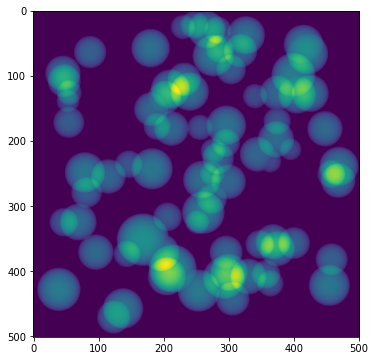

In [3]:
plt.figure(figsize=(6,6))
plt.imshow(simulation.density.sum(axis=0))

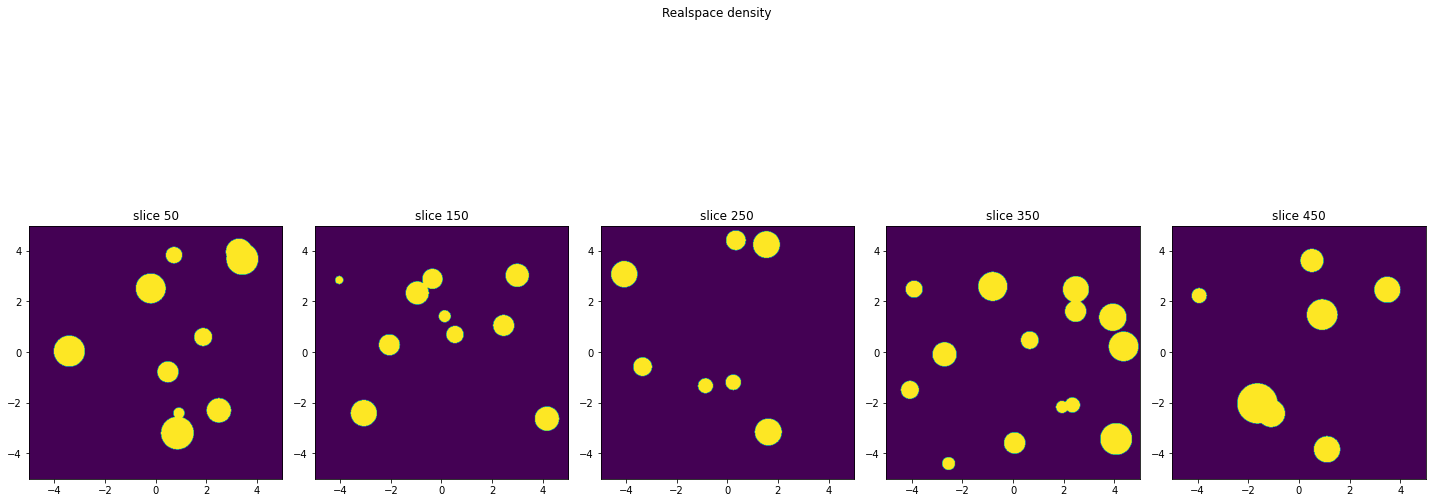

In [4]:
plot_slices(simulation.density, simulation.grid)

In [4]:
#plot_3D_structure(simulation.density, simulation.grid, realspace=True)

In [5]:
simulation.pin_memory()

In [6]:
simulation.calculate_custom_FTI_3D_slice(device = 'cuda')

In [8]:
#simulation.calculate_custom_FTI_3D(device = 'cpu')
simulation.calculate_torch_FTI_3D(device = 'cuda')

the maximal difference between the implementation of the FTI is 0.014576679348901516


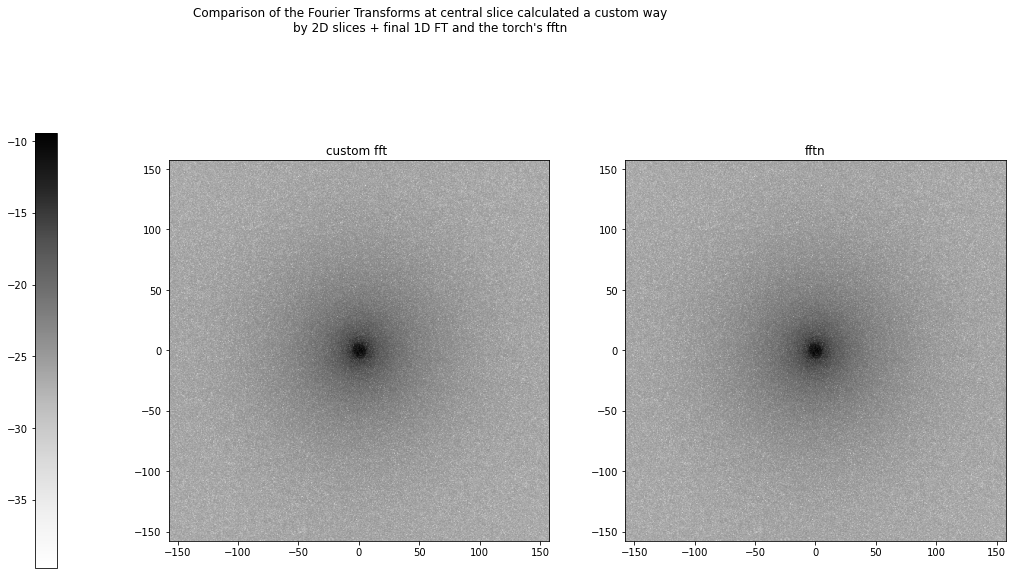

In [10]:
plot_FTI_version_center(simulation.FTI_slice_custom, simulation.FTI_slice_torch, simulation.qx)

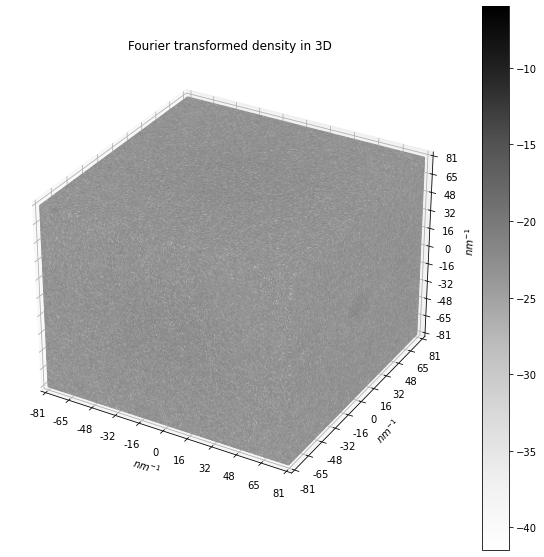

In [19]:
import torch
#plot_3D_structure(torch.from_numpy(simulation.FTI), simulation.qx, realspace= False)#, path = 'figures/FFT_spheres_example.png')

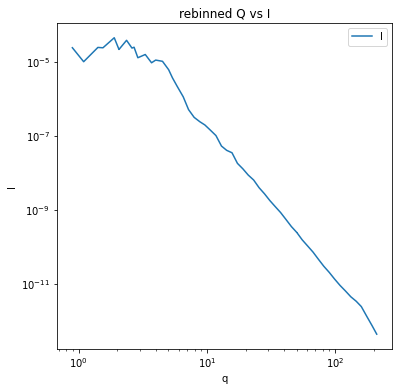

In [11]:
simulation.reBin(200, slice = 'center')
simulation.drop_first_bin()
plot_Q_vs_I(simulation.binned_slice)

In [12]:
simulation.init_sas_model()

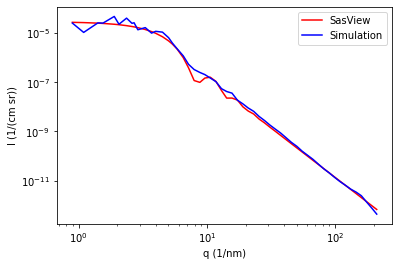

In [21]:
simulation.init_sas_model()
simulation.update_scaling(3.8722e-1)
plot_simulation_vs_sas( simulation.binned_slice, simulation.qx_sas, simulation.I_sas)

In [15]:
simulation.save_data(directory='dat_files')
print("the sphere file with radius {r:.3f}  is saved".format(r = simulation.rMean))

the sphere file with radius 0.532  is saved


In [9]:
from SAXSsimulations import  Sphere, Cylinder
from SAXSsimulations.plotting import *

simulation = Cylinder(size = 10, nPoints = 251, volFrac = 0.05)
simulation.place_shape(single = True)
print(simulation.theta, simulation.phi,simulation.grid_space)

rMean -0.5887228878643196
rMean -0.20076201359416057
rMean 1.0174867302895316
A: (-2.98,2.64), C: (-0.24,3.70)
[0.38674359 3.79215015]
Ellipse equation: (x-(-1.75))^2/1.28^2 +(y -(+3.70))^2/1.19^2<1, line equation: y > 0.39x+3.79
A: (-0.37,1.97), C: (2.13,2.93)
[0.38674363 2.10710087]
Ellipse equation: (x-(+0.77))^2/1.28^2 +(y -(+2.93))^2/1.19^2<1, line equation: y > 0.39x+2.11
A: (-1.56,1.11), C: (1.59,0.10) 0.10090053081512451 0.18585336208343506
Ellipse equation: (x-(-2.74))^2/1.28^2 +(y -(+0.10))^2/1.19^2<1, line equation: y < 0.39x+1.72
A: (1.68,3.93), C: (-1.86,2.56)
[0.38674363 3.2796942 ]
Ellipse equation: (x-(+0.31))^2/1.28^2 +(y -(+2.56))^2/1.19^2<1, line equation: y > 0.39x+3.28
A: (-3.69,-0.94), C: (-4.89,0.47) 2.6901402473449707 2.60518741607666
Ellipse equation: (x-(-2.28))^2/1.28^2 +(y -(+0.47))^2/1.19^2<1, line equation: y < 0.39x+0.49
A: (1.52,3.77), C: (-1.53,2.59)
[0.38674363 3.1783714 ]
Ellipse equation: (x-(+0.34))^2/1.28^2 +(y -(+2.59))^2/1.19^2<1, line equation: 

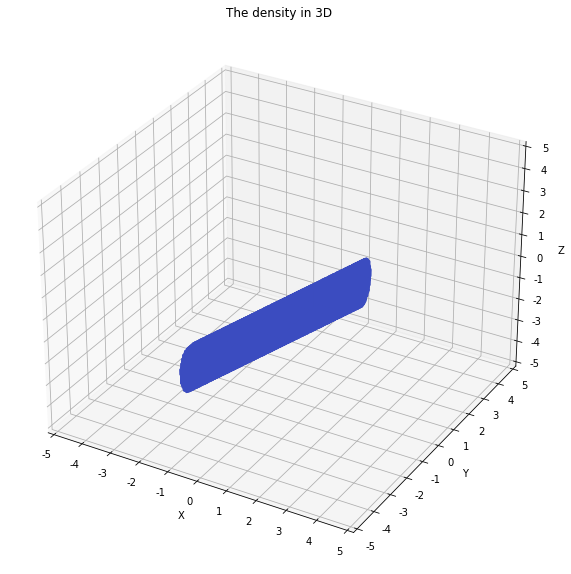

In [11]:
plot_3D_structure(simulation.density, simulation.grid, realspace=True)

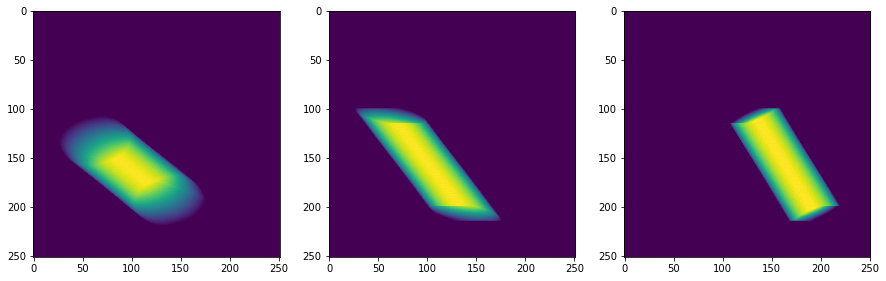

In [10]:
#plot_slices(simulation.density, simulation.grid, direction ='z')
plt_slices_sum(simulation)

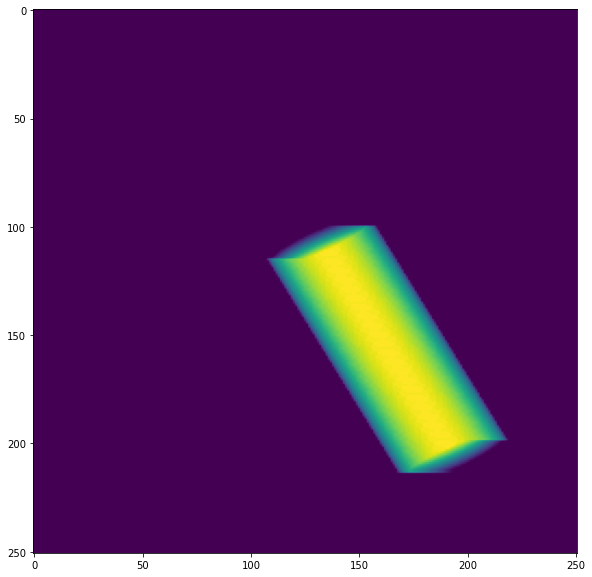

In [11]:
plt.figure(figsize = (10,10))
plt.imshow(simulation.density.sum(axis=2))
#plt.imshow(simulation.density[:,80,:])

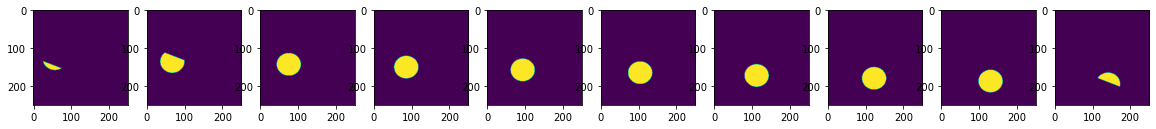

In [14]:
plot_slices_at_interval(12, 100, simulation, 'x')

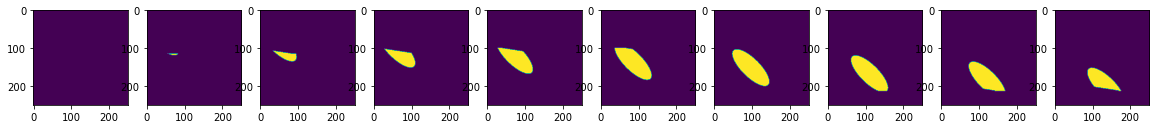

In [15]:
plot_slices_at_interval(10, 100, simulation, 'y')

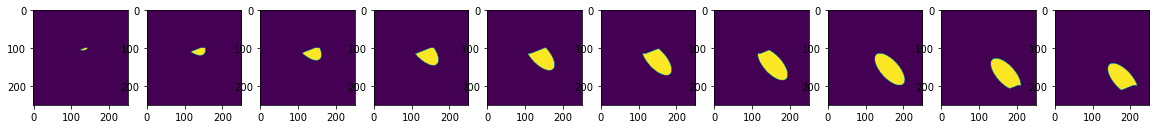

In [16]:
plot_slices_at_interval(10, 30, simulation, 'z')

In [52]:
simulation.pin_memory()

the maximal difference between the implementation of the FTI is 0.0008227470675171886


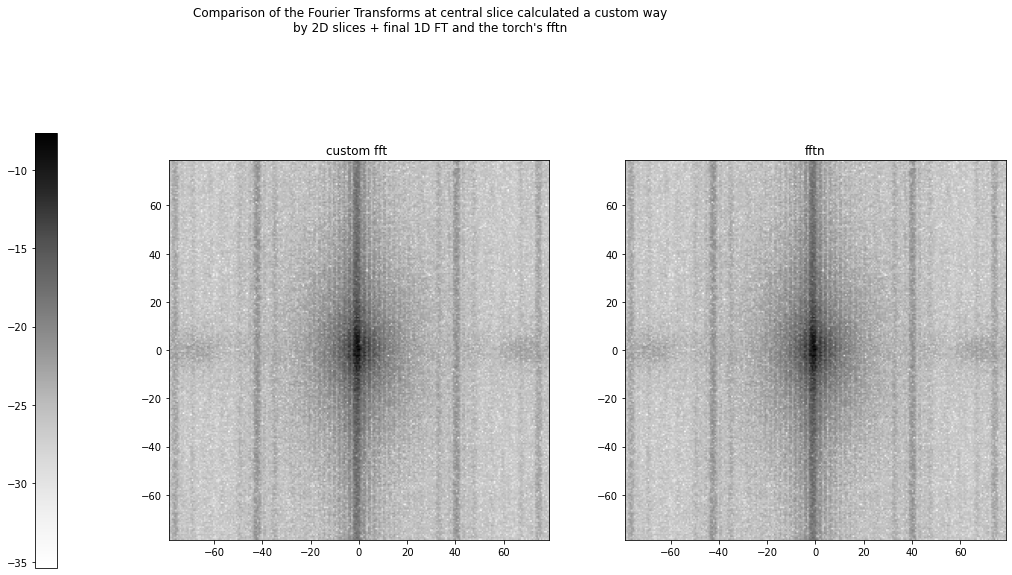

In [53]:
simulation.calculate_custom_FTI_3D_slice(device = 'cpu')
simulation.calculate_torch_FTI_3D(device = 'cpu')

plot_FTI_version_center(simulation.FTI_slice_custom, simulation.FTI_slice_torch, simulation.qx)

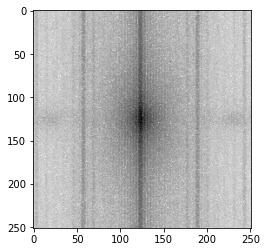

In [54]:
plt.imshow(np.log(simulation.FTI_sinc), cmap = 'Greys')

In [31]:
def plt_slices_sim(simulation):
    fig,axs = plt.subplots(1,3,figsize = (15,5))
    ax = axs[0]
    im = ax.imshow(np.log(simulation.FTI_custom[120,:,:]), cmap = 'Greys')
    ax = axs[1]
    im = ax.imshow(np.log(simulation.FTI_custom[:,120,:]), cmap = 'Greys')
    ax = axs[2]
    im = ax.imshow(np.log(simulation.FTI_custom[:,:,120]), cmap = 'Greys')
    plt.show()    


In [ ]:
#simulation.calculate_custom_FTI_3D(device = 'cpu')
#plt_slices_sim(simulation)

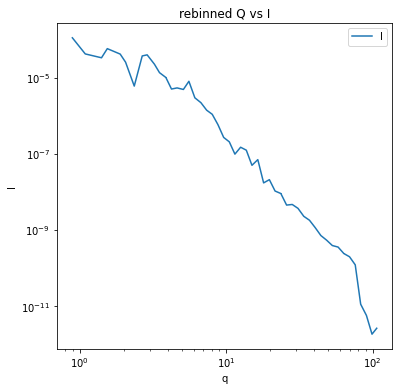

In [55]:
simulation.reBin(200, slice = 'center')
simulation.drop_first_bin()
plot_Q_vs_I(simulation.binned_slice)

In [56]:
simulation.save_data(directory='dat_files')
print("the cylinder file with radius {r:.3f} and height {h:.3f} is saved".format(r = simulation.rMean, h = simulation.hMean))

the cylinder file with radius 0.261 and height 6.146 is saved


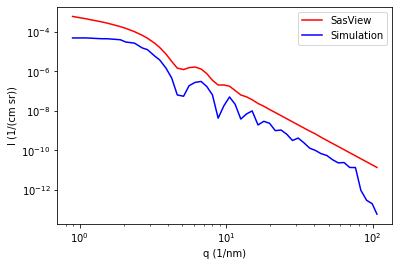

In [34]:
simulation.init_sas_model()
plot_simulation_vs_sas( simulation.binned_slice, simulation.qx_sas, simulation.I_sas)

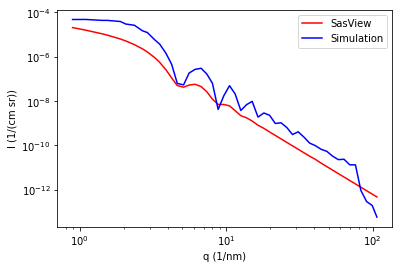

In [36]:

simulation.update_scaling(3.5198e-02)
plot_simulation_vs_sas( simulation.binned_slice, simulation.qx_sas, simulation.I_sas)

In [57]:
simulation.FTI_slice_custom

array([[3.96566185e-13, 1.44214659e-12, 1.62271000e-11, ...,
        2.48166528e-11, 6.89554731e-12, 8.57248547e-12],
       [1.00941808e-11, 2.99186797e-11, 1.45020316e-10, ...,
        5.79957472e-12, 7.10766998e-13, 1.19187783e-11],
       [2.02335074e-12, 1.39506103e-11, 6.04360996e-11, ...,
        9.62420549e-13, 1.72349347e-12, 4.01842074e-13],
       ...,
       [6.77598797e-12, 4.64564400e-12, 4.44232281e-11, ...,
        6.16905746e-12, 3.25597271e-11, 2.11795926e-11],
       [1.72440705e-11, 1.35578671e-11, 6.79395817e-11, ...,
        1.05244033e-11, 4.87724800e-12, 2.12932291e-11],
       [8.73414250e-12, 1.28120050e-12, 2.86011879e-11, ...,
        5.07674278e-13, 3.07413164e-12, 7.31140805e-12]])

the maximal difference between the implementation of the FTI is 1.755914088992787


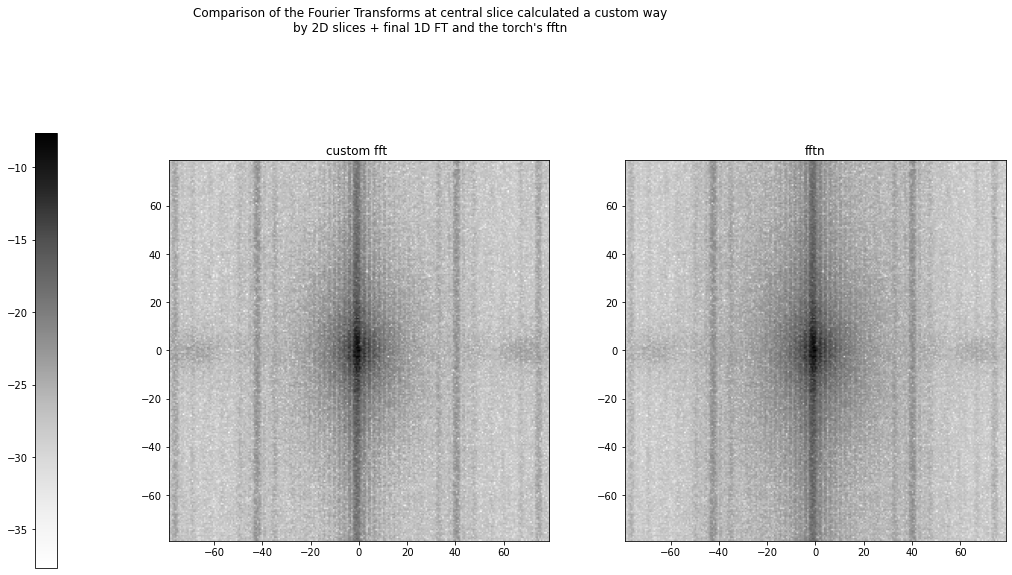

In [69]:
# the caption is wrong: it is actualy FTI of slice vs its sinc'ed
plot_FTI_version_center(simulation.FTI_slice_custom, simulation.FTI_sinc, simulation.qx)